## Module 9 Challenge - Analysis of Temperature Trends for the months of June and December in Oahu

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import statistics
import datetime as dt
from datetime import date
%matplotlib inline
import matplotlib.pyplot as plt


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).filter(func.strftime('%m',Measurement.date)=='06').all()


In [5]:
#  3. Convert the June temperatures to a list.
june_temps=list(june_temps)
june_temps.sort()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df=pd.DataFrame(june_temps)
june_temps_df.columns = ['Date', 'June Temps']
june_temps_df

,Date,June Temps
0,2010-06-01,69.0
1,2010-06-01,70.0
2,2010-06-01,71.0
3,2010-06-01,73.0
4,2010-06-01,74.0
...,...,...
1695,2017-06-30,75.0
1696,2017-06-30,75.0
1697,2017-06-30,75.0
1698,2017-06-30,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D1: Extra material for the anlysis report

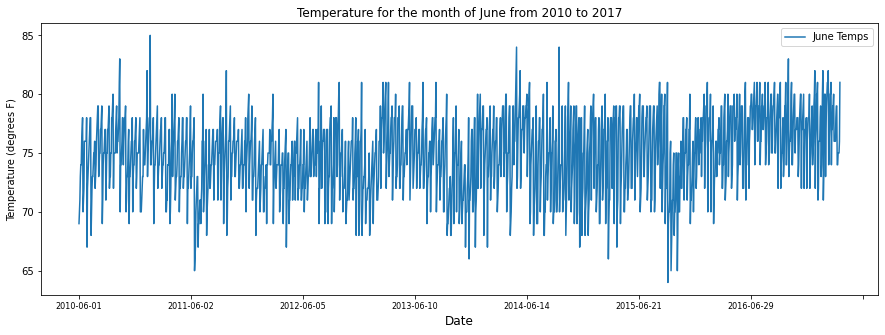

In [8]:
# Showing the temperature trend for the months of December in a line graph
june_temps_df.plot(x="Date",y="June Temps",figsize=(15,5))
plt.title("Temperature for the month of June from 2010 to 2017")
plt.xticks(rotation=0, fontsize=8)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (degrees F)", fontsize=10)
plt.savefig("June_Temps.png")
plt.show()

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(func.strftime('%m',Measurement.date)=='12').all()

In [10]:
# 7. Convert the December temperatures to a list.
dec_temps=list(dec_temps)
dec_temps.sort()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df=pd.DataFrame(dec_temps)
dec_temps_df.columns= ['Date','December Temps']
dec_temps_df

,Date,December Temps
0,2010-12-01,70.0
1,2010-12-01,71.0
2,2010-12-01,72.0
3,2010-12-01,72.0
4,2010-12-01,73.0
...,...,...
1512,2016-12-31,65.0
1513,2016-12-31,66.0
1514,2016-12-31,67.0
1515,2016-12-31,71.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
print("December Temperatures")
dec_temps_df.describe()

December Temperatures


,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


##  D2: Extra Material for the analysis report

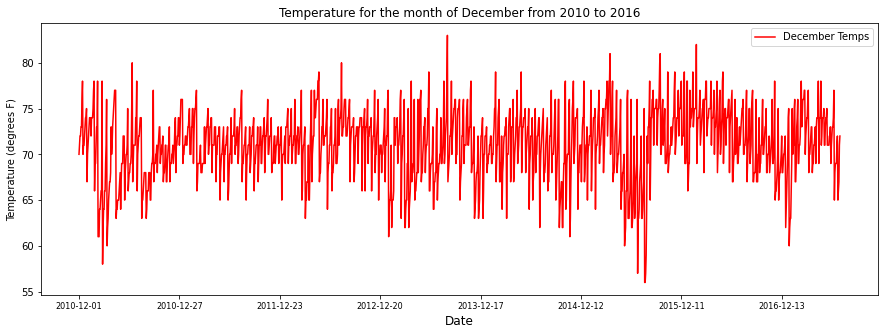

In [13]:
# Showing the temperature trend for the months of December in a line graph
dec_temps_df.plot(x="Date",y="December Temps", c="red", figsize=(15,5))
plt.title("Temperature for the month of December from 2010 to 2016")
plt.xticks(rotation=0, fontsize=8)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (degrees F)", fontsize=10)
plt.savefig("Dec_Temps.png")
plt.show()

## Extra material for the summary - June

In [14]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 

june_precipitation = []
june_precipitation = session.query(Measurement.date, Measurement.prcp).filter(func.strftime('%m',Measurement.date)=='06').all()

# Convert the June precipitation to a DataFrame
june_precipitation=list(june_precipitation)
june_precipitation_df=pd.DataFrame(june_precipitation)
june_precipitation_df.columns = ['Date', 'June Precipitation']
june_precipitation_df


,Date,June Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [15]:
#Statistics of June Precipitation
june_precipitation_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## Extra material for the summary December Precipitation

In [16]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 

dec_precipitation = []
dec_precipitation = session.query(Measurement.date, Measurement.prcp).filter(func.strftime('%m',Measurement.date)=='12').all()

# Convert the December precipitation to a DataFrame
dec_precipitation=list(dec_precipitation)
dec_precipitation_df=pd.DataFrame(dec_precipitation)
dec_precipitation_df.columns = ['Date', 'December Precipitation']
dec_precipitation_df


,Date,December Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [17]:
#Statistics of December Precipitation
dec_precipitation_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
